In [9]:
%run './model/multi_corpus.py'
%run './constants.py'

import itertools

In [4]:
corpora = co_citation_graphs()
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 1070 nodes and 2505 edges
Geometry Graph with 749 nodes and 1262 edges
Geophysics Graph with 22475 nodes and 119997 edges
Economics Graph with 5710 nodes and 81283 edges
Language & Linguistics Graph with 1925 nodes and 13565 edges
Probability & Statistics Graph with 2802 nodes and 13312 edges
Material Engineering Graph with 32157 nodes and 450244 edges
Artificial Intelligence Graph with 2817 nodes and 15003 edges
Sociology Graph with 3037 nodes and 31327 edges
International Business Graph with 4191 nodes and 82833 edges
Political Science Graph with 3367 nodes and 21319 edges
Genetics & Genomics Graph with 11868 nodes and 73011 edges
Immunology Graph with 17730 nodes and 271452 edges
Human Resources & Organizations Graph with 4657 nodes and 43787 edges
Ethnic & Cultural Studies Graph with 747 nodes and 1502 edges
Neurology Graph with 22058 nodes and 348235 edges


Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


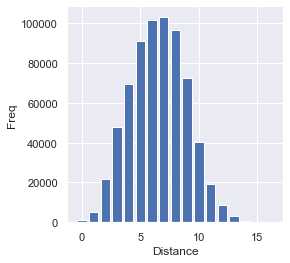

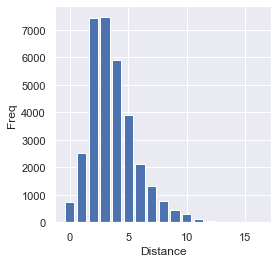

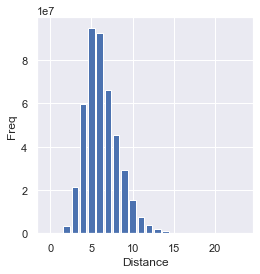

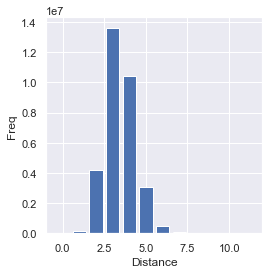

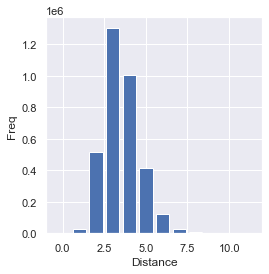

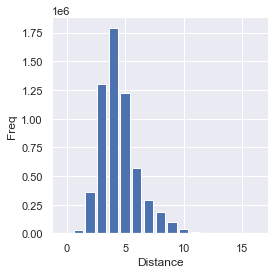

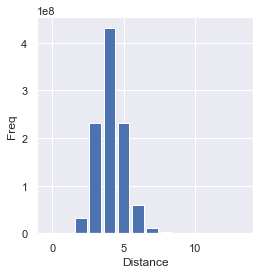

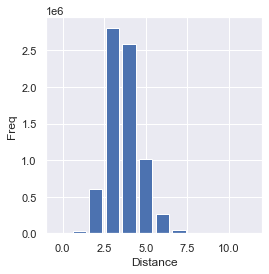

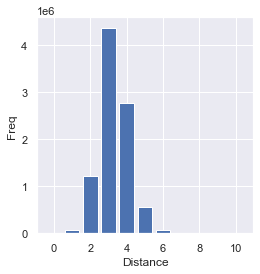

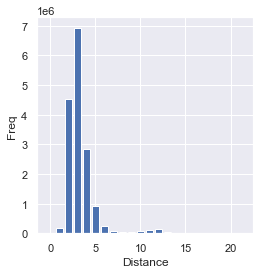

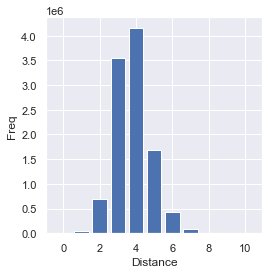

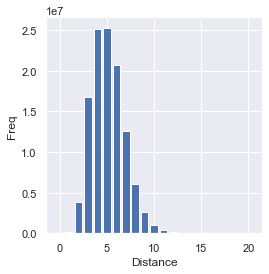

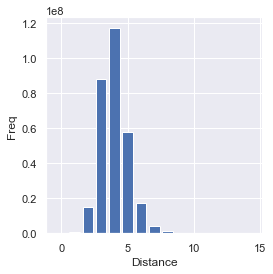

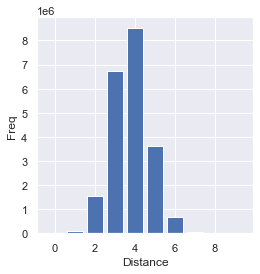

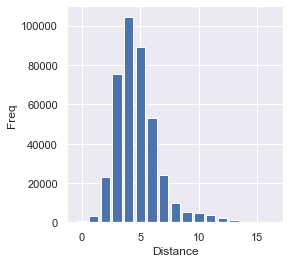

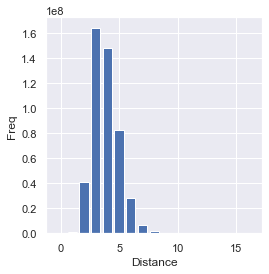

In [10]:
for field_name, G in Gs.items():

    print(field_name)

    shortest_path_dist = dict(nx.all_pairs_shortest_path_length(G))
    distances = list(itertools.chain.from_iterable([d.values() for d in shortest_path_dist.values()]))
    dist, freq = zip(*Counter(distances).items())

    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_axes([0, 0, 1, 1])

    plt.bar(dist, freq)

    ax.set_xlabel('Distance')
    ax.set_ylabel('Freq')

    fig.tight_layout()

    new_list = range(math.floor(min(dist)), math.ceil(max(dist))+1)
    ax.set_xticks(new_list)

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_citation_node_distance_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )